In [1]:
import chromadb
import chromadb.utils.embedding_functions as embedding_functions

from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

import json
import os
import ast
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
CHROMADB_PATH = os.getenv("CHROMADB_PATH")
MAX_CHAT_HISTORY_LENGTH = 5

chromadb_client = chromadb.PersistentClient(path=CHROMADB_PATH)
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="thenlper/gte-base")
embeddings = HuggingFaceEmbeddings(model_name="thenlper/gte-base")

reports_collection = chromadb_client.get_or_create_collection(name="reports", embedding_function=embedding_function) # If not specified, by default uses the embedding function "all-MiniLM-L6-v2"
users_collection = chromadb_client.get_or_create_collection(name="users", embedding_function=embedding_function) # If not specified, by default uses the embedding function "all-MiniLM-L6-v2"
doctor_collection = chromadb_client.get_or_create_collection(name="doctors", embedding_function=embedding_function)

reports_vector_store = Chroma(
    client=chromadb_client,
    collection_name="reports",
    embedding_function=embeddings,
)

source_folder = os.getenv("SOURCE_FOLDER")

c:\Users\a21ma\OneDrive\Desktop\Code\Internships and Other Work\Purrytails\venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
names = [ast.literal_eval(entry)["name"] for entry in users_collection.get()['documents']]
names

['Abhay Mathur', 'Rimzhim Mathur']

In [5]:
emails = [ast.literal_eval(entry)["email"] for entry in users_collection.get()['documents']]
emails

['a21.mathur21@gmail.com', 'rimzhim.lal@gmail.com']

[{'petName': 'Pichku',
  'breed': 'Pekingese Lion',
  'petType': 'dog',
  'sex': '',
  'weight': 11,
  'ageYears': 10,
  'ageMonths': 0,
  'profilePicture': '',
  'petId': 'af92e01c-da51-45f4-8ab5-f7e9de50f7ef'},
 {'petName': 'Yoda',
  'breed': 'French Bulldog',
  'petType': 'dog',
  'sex': '',
  'weight': 13,
  'ageYears': 7,
  'ageMonths': 2,
  'profilePicture': '',
  'petId': 'cbfc3ac9-9a9c-4205-ba64-9ed64b22f3d7'}]
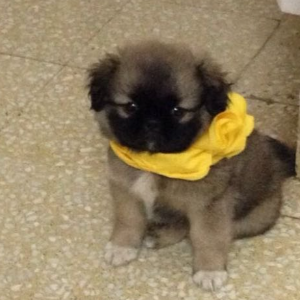
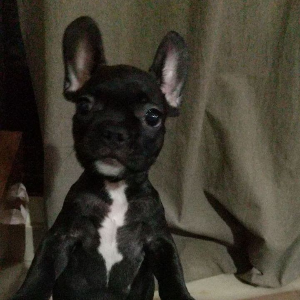

In [12]:
json.loads(users_collection.get(ids=["e6cda215-1fba-4fde-beb2-ad81770035bc"])["metadatas"][0]["pet_details"])

In [26]:
results = reports_vector_store.similarity_search_with_score(
    query="prothrombin", k=no_of_reports, filter={"user_id": "643c7c5a-b74c-4329-839e-7bc4a92be2f3"}
)
reports = []
if results and any(score < 0.4 for _, score in results):
    for res, score in results:
        if score < 0.4:
            # print(f"* [SIM={score:3f}] {res.page_content} [{res.metadata}]")
            json_report = ast.literal_eval(res.page_content)
            json_report["id"] = res.metadata["report_id"]
            reports.append(json_report)
            
            
else:
    print("No results found.")
    
    
reports

[{'date': '2024-03-08',
  'document': 'medical report',
  'diseases': 'None',
  'medicines': 'Coumadin (warfarin) therapy',
  'doctor': 'DR. KIRAN GADRE',
  'summary': 'This is a medical report for Mr. Darsh Thakkar, who was tested for Prothrombin Time (PT) and International Normalized Ratio (INR). The report notes that the INR is used only for patients on stable oral anticoagulant therapy and makes no significant contribution to the diagnosis or treatment of patients whose PT is prolonged for other reasons. The report also mentions that the therapeutic range varies with disease and treatment dosage. The report mentions that increased PT times may be due to congenital or acquired factor deficiencies, liver diseases, hemorrhagic disease of the newborn, malabsorption, DIC, vitamin K deficiency, and  hibrinolysis. The report also mentions that interference in PT/INR can be caused by alcohol, antibiotics, aspirin, cimetidine, thrombin inhibitors, barbiturates, oral contraceptives, hormone-

In [19]:
relevant_reports=[]

report = reports_collection.query(
                query_texts=["date"],
                n_results=2,
                include=["documents", "metadatas"],
            )

report_document = report["documents"][0][0]
report_metadata = report["metadatas"][0][0]
print(type(report_document))
report = ast.literal_eval(report_document)
report["id"] = report_metadata["report_id"]
relevant_reports.append(report)

relevant_reports

<class 'str'>


[{'date': '2023-10-15',
  'document': 'medical prescription',
  'diseases': 'throat pain, fever, bodyache',
  'medicines': 'tab Oncot CF, syp Dilo Dr, tab Dolo 650',
  'doctor': 'Dr. Madhavi Paradkar',
  'summary': 'The patient is suffering from throat pain, fever, and bodyache. The doctor has prescribed tab Oncot CF, syp Dilo Dr, and tab Dolo 650.',
  'domain': 'General Medicine: Comprehensive care for adult patients with various diseases.',
  'link': 'http://localhost:5000/uploaded_images/test2.jpeg',
  'report_id': 'cb1ffeac-7752-4f6f-af65-caef08310094',
  'id': 'cb1ffeac-7752-4f6f-af65-caef08310094'}]

In [5]:
reports_collection.get(include=["metadatas"])

{'ids': ['7b981d60-0a09-4811-a2ff-9102cd7001f4',
  '2b951dba-aa11-4eae-8699-1baad6421007',
  '0b792de6-bcf4-49a0-95b7-f7056ec76022',
  '2fd53905-1878-4cf1-bb53-aafc7fa85c09'],
 'embeddings': None,
 'documents': None,
 'uris': None,
 'data': None,
 'metadatas': [{'date': '2023-10-15',
   'report': 'CLINIC :\nDarshana Park, \'A-1\',\nLane 9B, Kalyani Nagar,\nPune - 06.\nPh: 9822004602\n\nCure Well Clinic\nGENERAL - PEDIATRIC\nVisod that kas\n2 days.\n15-101123\n-  thwat pain \n-  femi\n-  bodyache & 1 day.\n-  cnd\n-  dono\n\nDr. Madhavi Paradkar\nM.B.B.S. DCH\nReg No. - 79755\nThurs\nemtt.\nTab Oncat. CF x sd\n- syp Dilo Dr. x 3 day \nsone - sm\nAN\nNH\nTab Dolo sm\nosd\nAdle\nHessmgomn.\nTiming : Mon. - Fri.: "11.00 a.m. to 1.30 p.m." & "6.30 p.m. to 8.30 p.m." Sat.: "11 am to 2 p.m."\n• Saturday Evening & Sunday Closed •',
   'report_id': '7b981d60-0a09-4811-a2ff-9102cd7001f4',
   'user_id': '49390894-ceb1-4e76-abc4-4463eaab3a24'},
  {'date': '2024-03-08 00:00:00',
   'report': "['Mr.

In [6]:
reports_collection.get(ids=['7b981d60-0a09-4811-a2ff-9102cd7001f4'])

{'ids': ['7b981d60-0a09-4811-a2ff-9102cd7001f4'],
 'embeddings': None,
 'documents': ["{'date': '2023-10-15', 'document': 'medical prescription', 'diseases': 'throat pain, bodyache', 'medicines': 'tab Oncot CF x 1, syp Dilo Dr x 1, tab Dolo 650', 'doctor': 'Dr. Madhavi Paradkar', 'domain': 'General Medicine: Comprehensive care for adult patients with various diseases.', 'link': 'http://localhost:5000/uploaded_images/test2.jpeg', 'report_id': '7b981d60-0a09-4811-a2ff-9102cd7001f4'}"],
 'uris': None,
 'data': None,
 'metadatas': [{'date': '2023-10-15',
   'report': 'CLINIC :\nDarshana Park, \'A-1\',\nLane 9B, Kalyani Nagar,\nPune - 06.\nPh: 9822004602\n\nCure Well Clinic\nGENERAL - PEDIATRIC\nVisod that kas\n2 days.\n15-101123\n-  thwat pain \n-  femi\n-  bodyache & 1 day.\n-  cnd\n-  dono\n\nDr. Madhavi Paradkar\nM.B.B.S. DCH\nReg No. - 79755\nThurs\nemtt.\nTab Oncat. CF x sd\n- syp Dilo Dr. x 3 day \nsone - sm\nAN\nNH\nTab Dolo sm\nosd\nAdle\nHessmgomn.\nTiming : Mon. - Fri.: "11.00 a.

In [6]:
doctor_collection.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [4]:
doctor_collection.get(ids=['4c572c6e-7313-4329-9c02-6fce33b9f12f'])

{'ids': ['4c572c6e-7313-4329-9c02-6fce33b9f12f'],
 'embeddings': None,
 'documents': ["{'user_id': '4c572c6e-7313-4329-9c02-6fce33b9f12f', 'email': 'abhaymathur2101@gmail.com', 'name': 'Abhay Mathur', 'shared_reports': '[]'}"],
 'uris': None,
 'data': None,
 'metadatas': [{'email': 'abhaymathur2101@gmail.com',
   'name': 'Abhay Mathur',
   'shared_reports': '[{"report_id": "1f5b37bd-e392-4b4a-86cf-a9aebb2098b1", "notes": ""}, {"report_id": "7ed05ef1-4b42-421e-89d6-421ce84275e8", "notes": ""}]'}],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [24]:
doctor_data = doctor_collection.get(
                    include=["documents", "metadatas"],
                    ids=["4c572c6e-7313-4329-9c02-6fce33b9f12f"],
                )
                
shared_reports_data = json.loads(doctor_data["metadatas"][0]["shared_reports"])
print(shared_reports_data)
doctor_report_ids = [report["report_id"] for report in shared_reports_data]
print(doctor_report_ids)
doctor_report_ids = ['7ed05ef1-4b42-421e-89d6-421ce84275e8', '1f5b37bd-e392-4b4a-86cf-a9aebb2098b1']

[{'report_id': '1f5b37bd-e392-4b4a-86cf-a9aebb2098b1', 'notes': ''}, {'report_id': '7ed05ef1-4b42-421e-89d6-421ce84275e8', 'notes': ''}]
['1f5b37bd-e392-4b4a-86cf-a9aebb2098b1', '7ed05ef1-4b42-421e-89d6-421ce84275e8']


In [28]:
results = reports_vector_store.similarity_search_with_score(
                    query="medical report", k=2, filter={"report_id": {
                        "$in": doctor_report_ids
                    }}
                )
results

[(Document(metadata={'date': '2024-03-08', 'report': 'Mr. DARSH THAKKAR\nF 09 CHAND SOC NR ISKON JUHU\nMumbai.\nTel No : 8668861043\nPIN No : 400049\nPID No : P4002351998829\nAge : 20 Year(S) Sex : Male\n\nReference: DR. KIRAN GADRE\nSample Collected At:\nPreventive Care(mhl)\n303 Sunrise Business Park Kisan Nagar\nRoad No 16 Wagle Estate Thane -\n400604.\nProcessing Location: Metropolis\nHealthcare Ltd. Unit No409-416,4th\nFloor,Commercial Building-1,Kohinoor\nMall,Mumbai-70\n\nVID: 230330505340808\nRegistered On:\n08/03/2024 01:47 PM\nCollected On:\n08/03/2024 1:44PM\nReported On:\n08/03/2024 05:58 PM\n\nInvestigation | Observed Value | Unit | Biological Reference Interval\n------- | -------- | -------- | --------\nProthrombin Time (PT) | 13.0 | sec | 11-16\n(Citrated plasma) |  |  |  \nProthrombin Time | 13.3 | sec | --\nControl (MNPT) |  |  |  \nRatio | 0.98 |  | --\nIndex | 102.31 | % | --\nPT(INR) Value | 0.98 |  | Normal Population: 0.8 - 1.2\n |  |  | Standard Therapy: 2.0 - 3.